<a href="https://colab.research.google.com/github/PriyanshuRao-code/AI-Lab-Project/blob/riya/team_24_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Don't do anything here. It is just a setup.
import os
import sys

repo_name = "AI-Lab-Project"
repo_url = "https://github.com/PriyanshuRao-code/AI-Lab-Project.git"
repo_path = f"/content/{repo_name}"

if os.path.exists(repo_path):
    print("Repository already exists at:", repo_path)
else:
    print("🚀 Cloning the repository...")
    os.system(f"git clone {repo_url}")

os.chdir(repo_path)
sys.path.append(repo_path)

print("Repository is ready to use at:", repo_path)

Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project


In [ ]:
# Start your code from here

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('24.csv')

In [18]:
df.head(10)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
5,3671135,3671135,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,J2000,False
6,2495323,2495323,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,J2000,False
7,2153315,2153315,19.2,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,...,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,J2000,False
8,2162463,2162463,17.8,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,...,80.211132,447.837013,0.872705,353.422394,1.418397,2.458222e+06,182.236432,0.803864,J2000,False
9,2306383,2306383,21.5,0.133216,0.297879,133.215567,297.879063,0.082776,0.185093,437.058960,...,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862,J2000,True


In [17]:
total_missing = df.isnull().sum().sum()
print("\nTotal Missing Values:", total_missing)


Total Missing Values: 0


In [19]:
df["Neo Reference ID"].equals(df["Name"])

True

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df_numeric = df.select_dtypes(include=["number"])

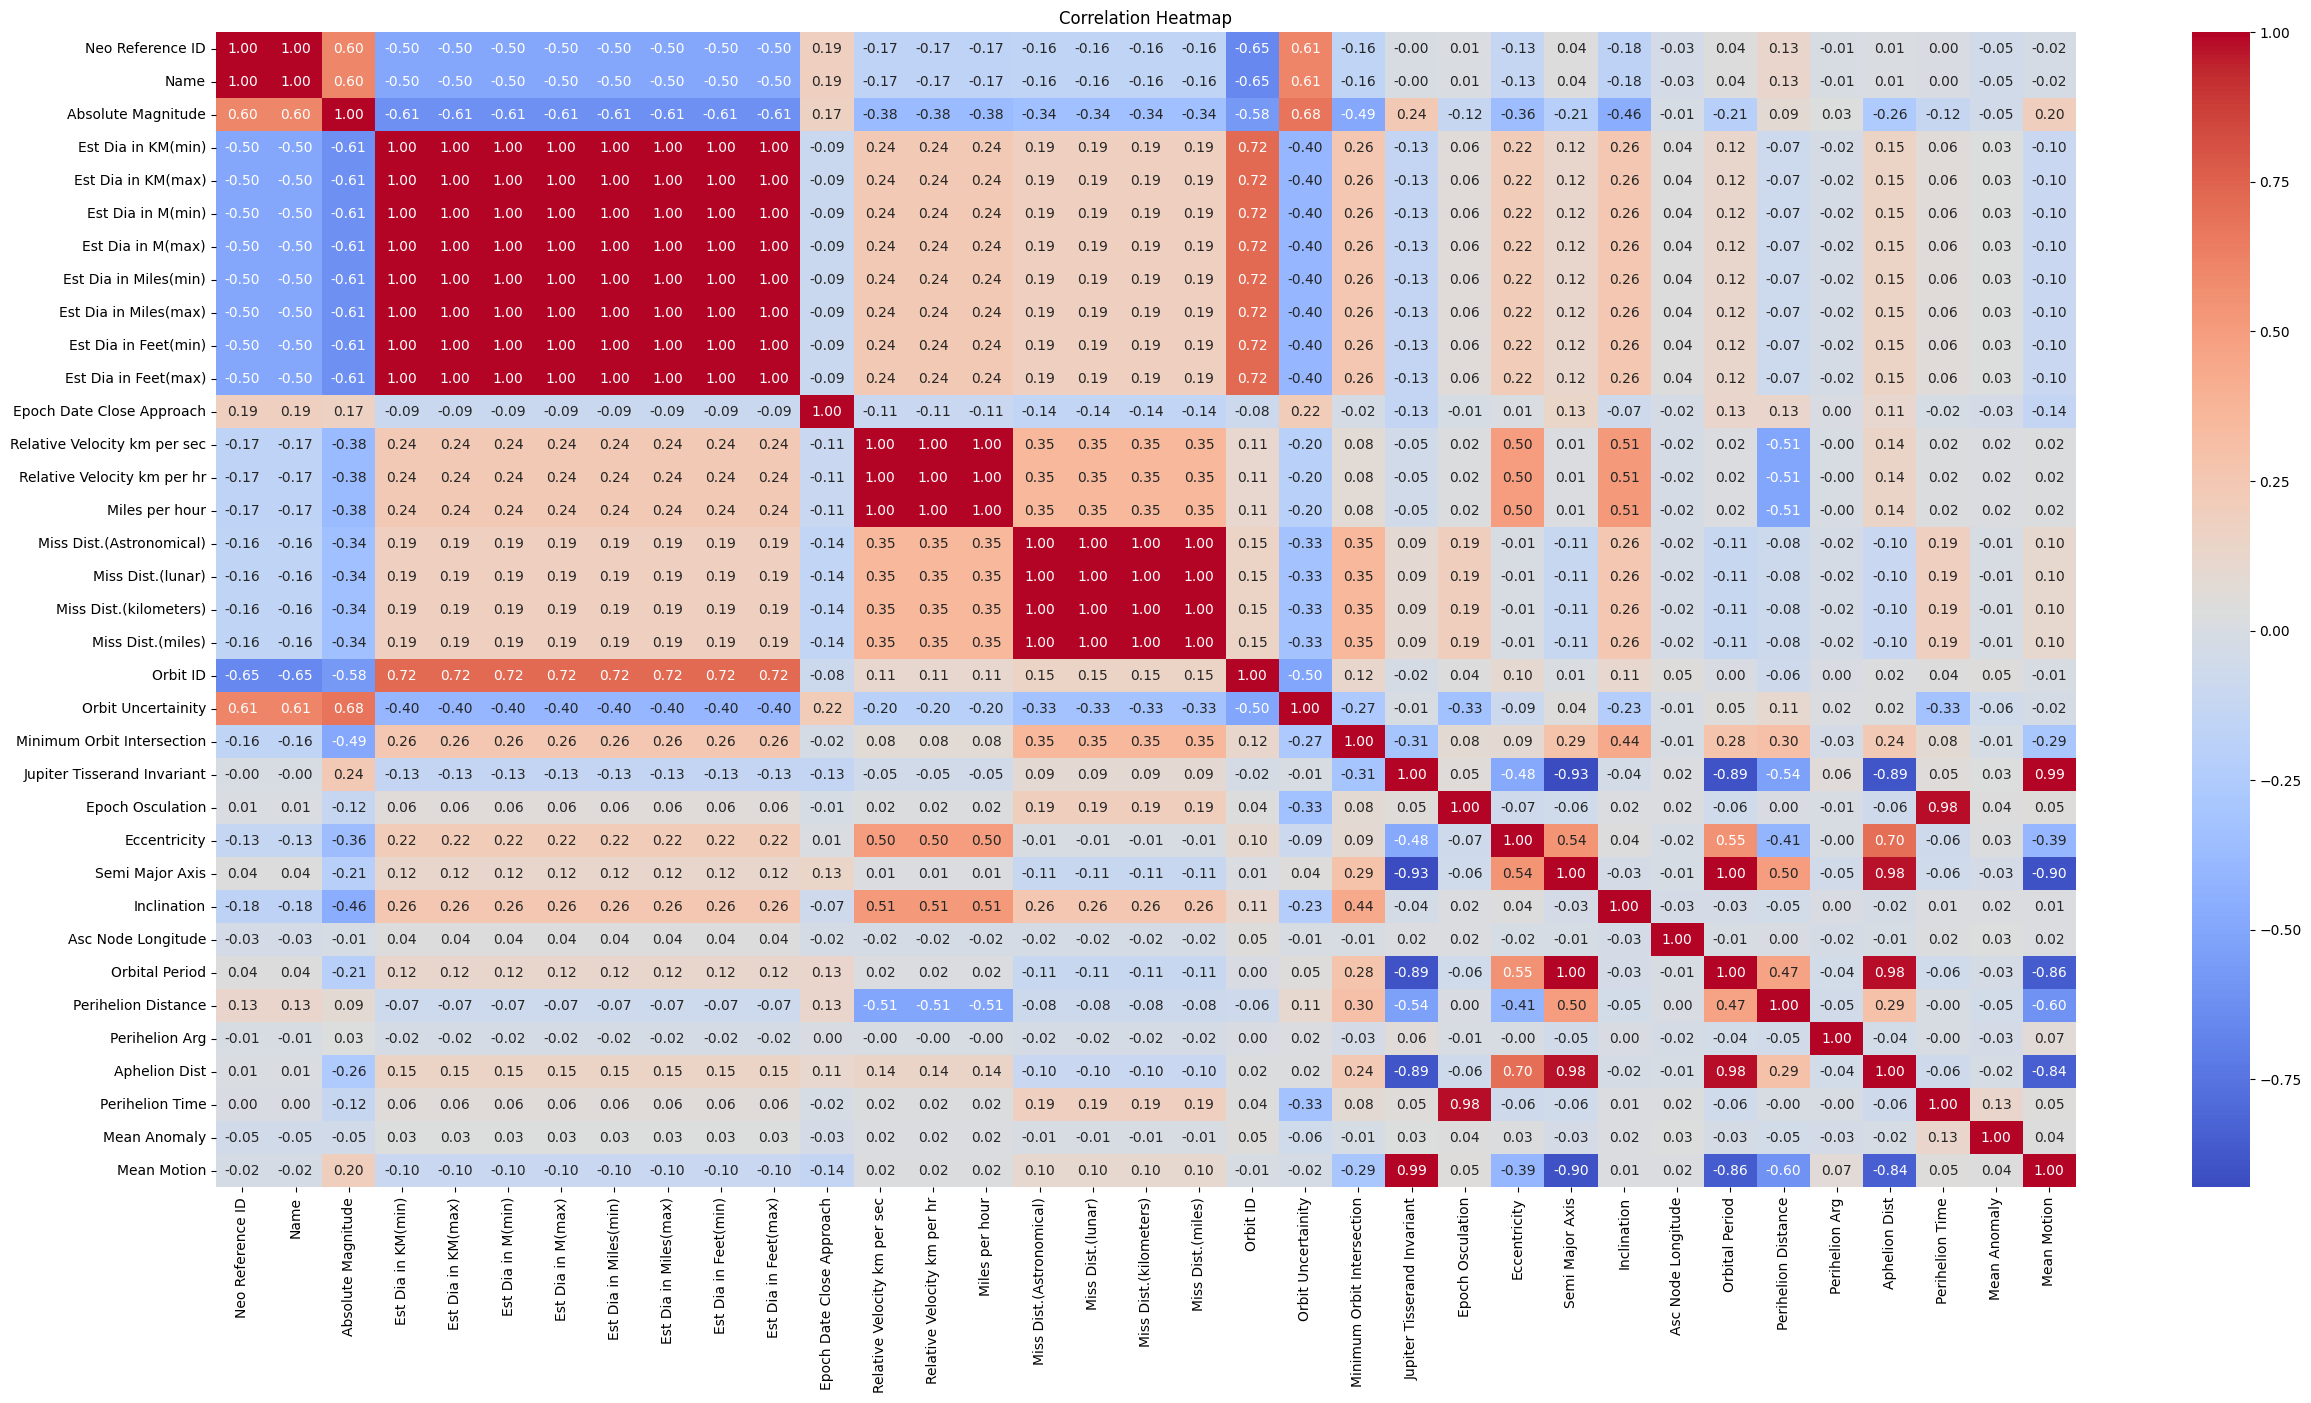

In [24]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

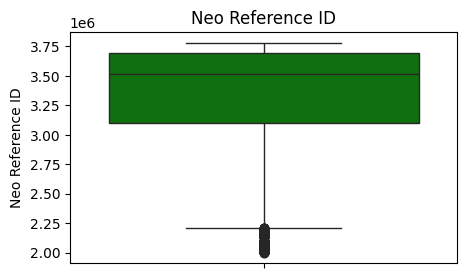

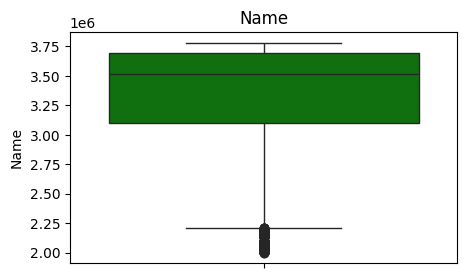

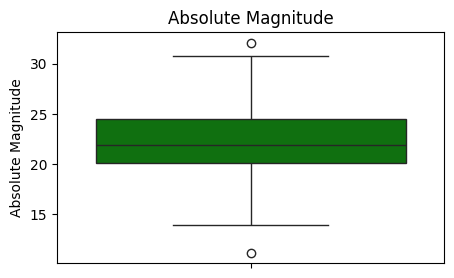

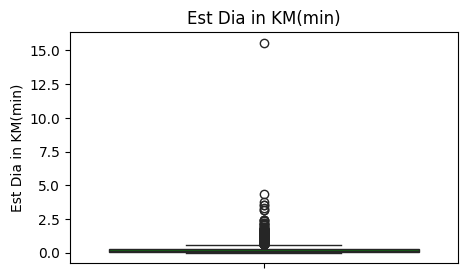

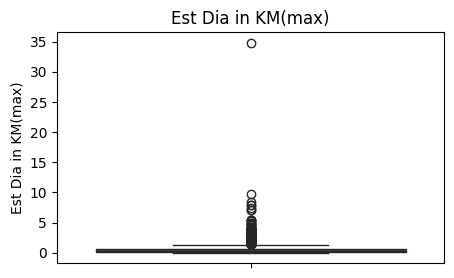

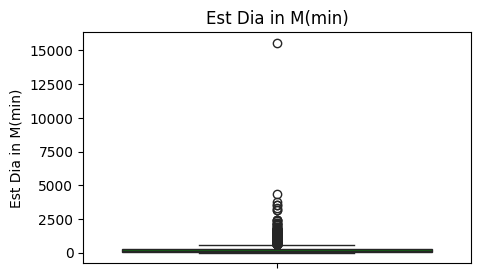

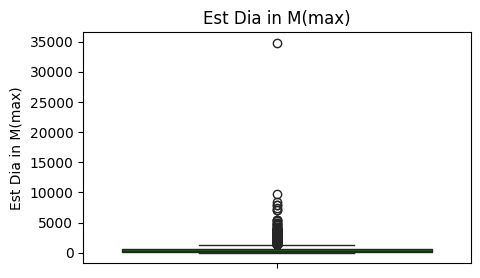

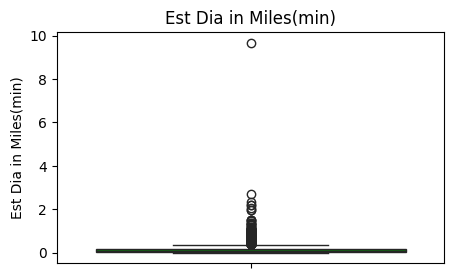

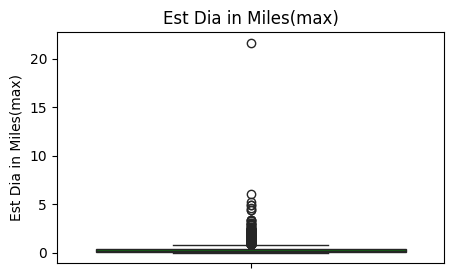

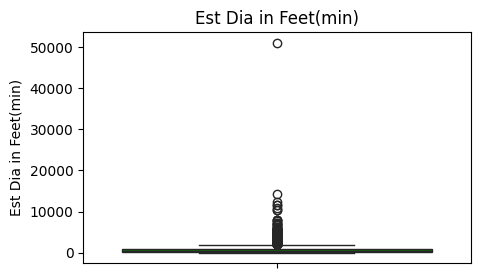

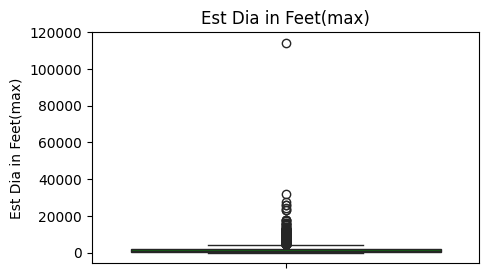

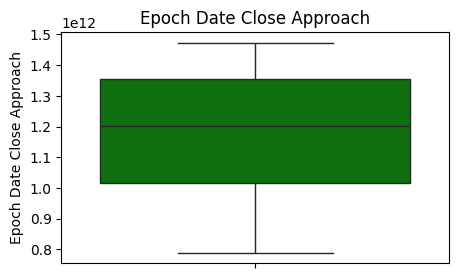

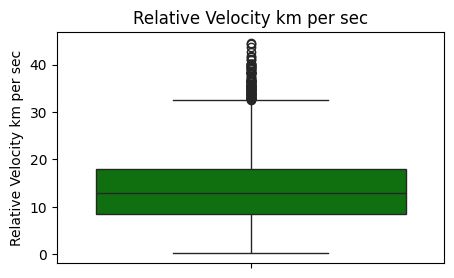

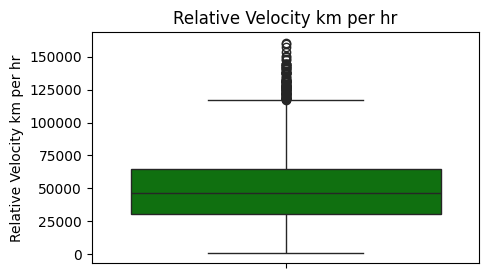

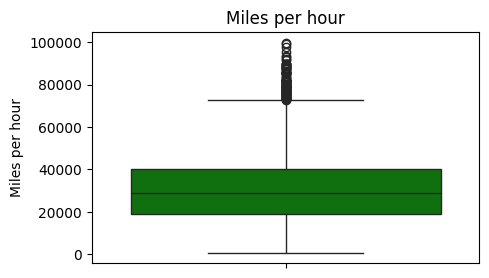

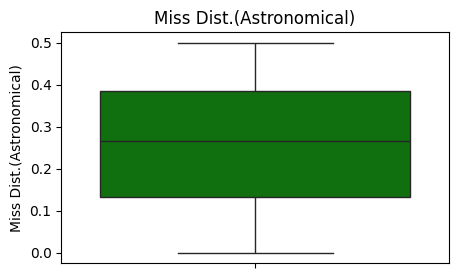

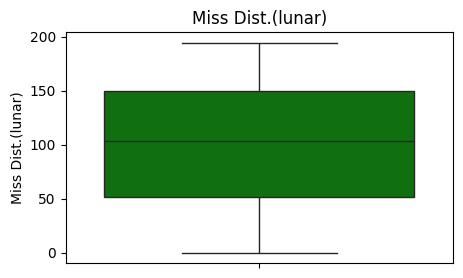

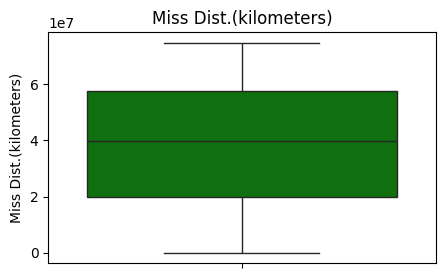

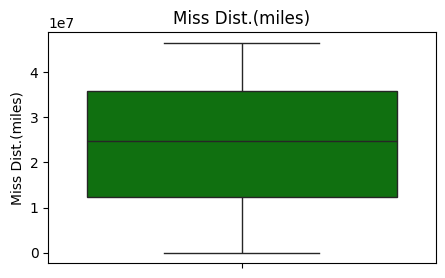

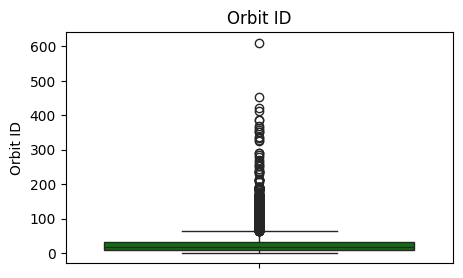

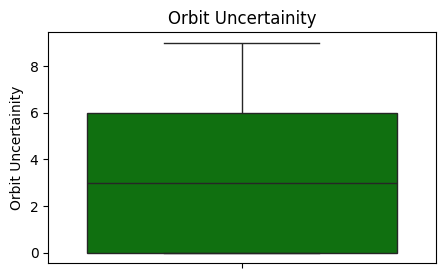

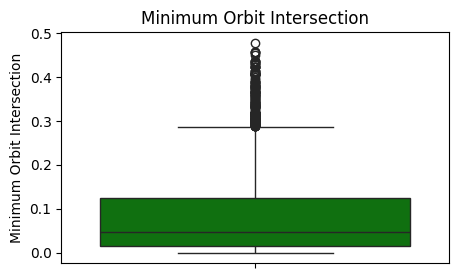

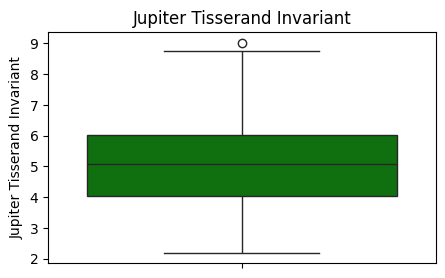

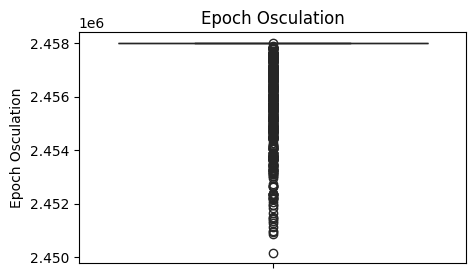

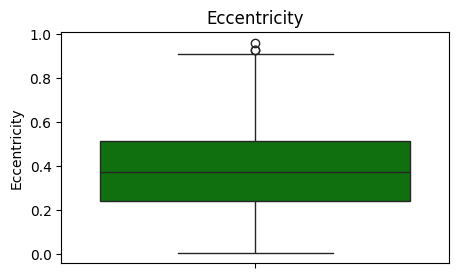

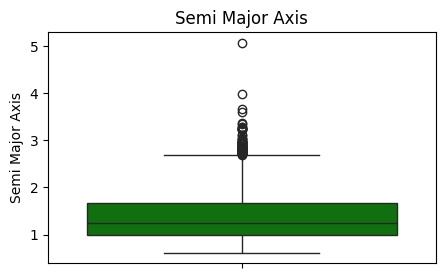

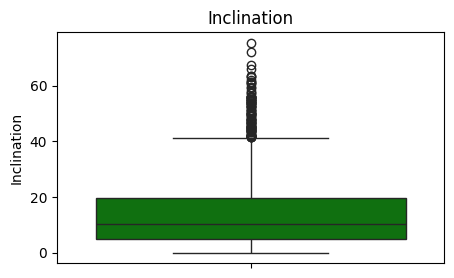

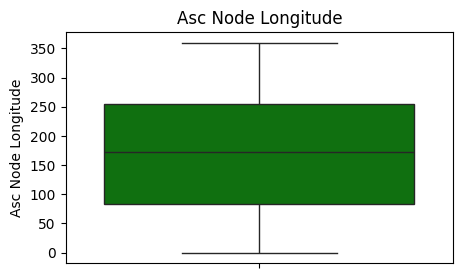

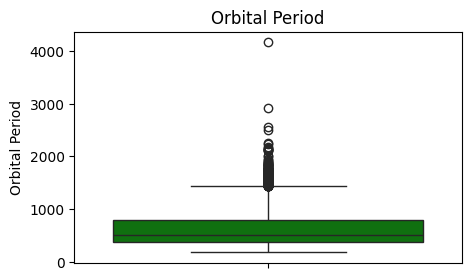

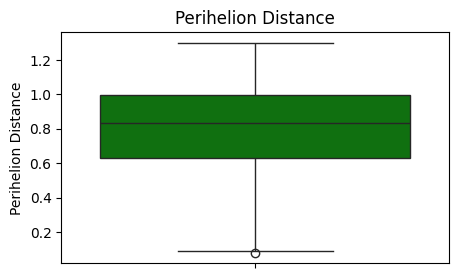

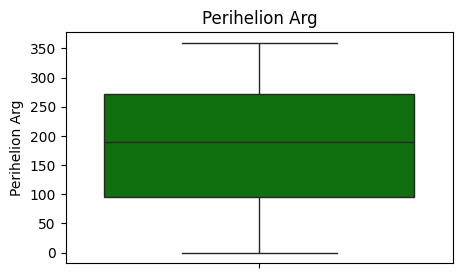

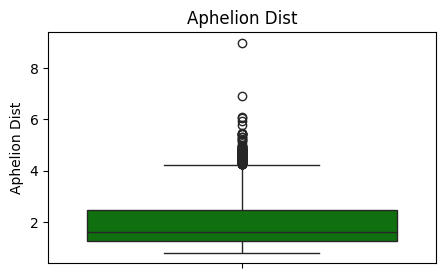

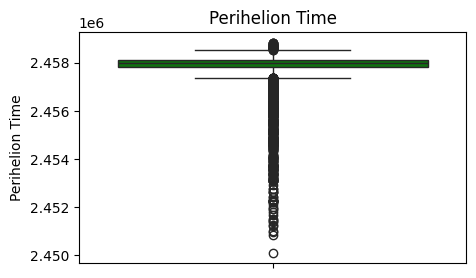

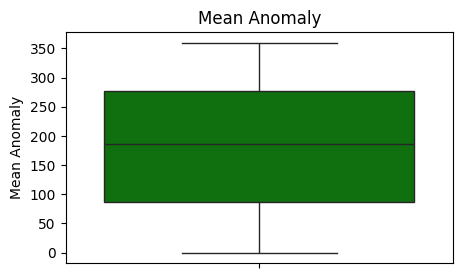

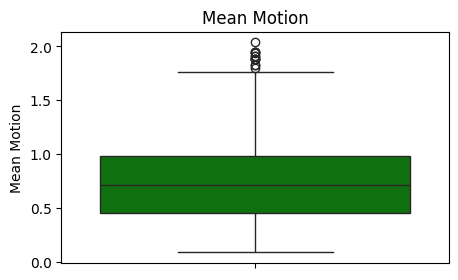

In [57]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[col], color="green")
    plt.title(col)
    plt.show()


In [56]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
df_cleaned = df[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]
print("Outliers removed using IQR method:", df.shape[0] - df_cleaned.shape[0])


Outliers removed using IQR method: 1603


In [59]:
from scipy.stats import zscore

z_scores = df.select_dtypes(include=['number']).apply(zscore)
df_z = df[(z_scores.abs() < 3).all(axis=1)]
print("Outliers removed using IQR method:", df.shape[0] - df_z.shape[0])

Outliers removed using IQR method: 500


In [28]:
# Find columns with correlation = 1 (excluding self-correlation)
high_corr_pairs = set()
for i in range(len(df_numeric.corr().columns)):
    for j in range(i):
        if df_numeric.corr().iloc[i, j] == 1:
            col1 = df_numeric.corr().columns[i]
            col2 = df_numeric.corr().columns[j]
            high_corr_pairs.add((col1, col2))

# Drop one of each highly correlated pair
columns_to_drop = {col2 for col1, col2 in high_corr_pairs}
df_reduced = df_cleaned.drop(columns=columns_to_drop)

print(f"Removed columns: {columns_to_drop}")
print(f"New dataset shape: {df_reduced.shape}")


Removed columns: {'Neo Reference ID'}
New dataset shape: (4687, 39)


In [36]:
from sklearn.preprocessing import MinMaxScaler

df_numeric = df_reduced.select_dtypes(include=['number'])
df_non_numeric = df_reduced.select_dtypes(exclude=['number'])
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_minmax = pd.concat([df_minmax, df_non_numeric.reset_index(drop=True)], axis=1)
df_minmax.head()

,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),...,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox,Hazardous
0,0.955757,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,...,0.159035,0.146942,0.922502,0.735825,0.258239,1995-01-01,Earth,2017-04-06 08:36:37,J2000,True
1,0.967475,0.484241,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,...,0.869714,0.084790,0.880542,0.482720,0.388713,1995-01-01,Earth,2017-04-06 08:32:49,J2000,False
2,0.250597,0.436485,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,...,0.690049,0.142186,0.917790,0.813777,0.242271,1995-01-08,Earth,2017-04-06 09:20:19,J2000,True
3,0.613020,0.775549,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,...,0.051949,0.088525,0.892829,0.190984,0.314430,1995-01-15,Earth,2017-04-06 09:15:49,J2000,False
4,0.850068,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,...,0.439619,0.083102,0.882772,0.375475,0.327805,1995-01-15,Earth,2017-04-06 08:57:58,J2000,True


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_standard = pd.concat([df_standard, df_non_numeric.reset_index(drop=True)], axis=1)
df_standard.head()

,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),...,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox,Hazardous
0,0.785321,-0.231042,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,...,-1.223886,0.019571,0.459190,0.778393,-0.431100,1995-01-01,Earth,2017-04-06 08:36:37,J2000,True
1,0.823377,-0.334824,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,...,1.247897,-0.514802,0.070818,-0.069093,0.312582,1995-01-01,Earth,2017-04-06 08:32:49,J2000,False
2,-1.504780,-0.680766,0.072789,0.072789,0.072789,0.072789,0.072789,0.072789,0.072789,0.072789,...,0.623011,-0.021323,0.415579,1.039404,-0.522114,1995-01-08,Earth,2017-04-06 09:20:19,J2000,True
3,-0.327763,1.775418,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,...,-1.596341,-0.482690,0.184540,-1.045928,-0.110818,1995-01-15,Earth,2017-04-06 09:15:49,J2000,False
4,0.442083,-0.231042,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,...,-0.248001,-0.529316,0.091457,-0.428186,-0.034580,1995-01-15,Earth,2017-04-06 08:57:58,J2000,True


In [38]:
from sklearn.preprocessing import LabelEncoder

In [50]:
print(df_reduced.dtypes)

Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64


In [48]:
print(df['Equinox'].unique())

['J2000']


In [49]:
print(df['Orbiting Body'].unique())

['Earth']


In [39]:
# Select categorical columns
categorical_cols = df_minmax.select_dtypes(include=['object']).columns

# Label Encoding (if needed for specific models)
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_minmax[col] = label_encoder.fit_transform(df[col])  # Modifies df inplace

df_minmax.head()  # Encoded dataset

,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),...,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox,Hazardous
0,0.955757,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,...,0.159035,0.146942,0.922502,0.735825,0.258239,0,0,534,0,True
1,0.967475,0.484241,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,...,0.869714,0.084790,0.880542,0.482720,0.388713,0,0,432,0,False
2,0.250597,0.436485,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,...,0.690049,0.142186,0.917790,0.813777,0.242271,1,0,1910,0,True
3,0.613020,0.775549,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,...,0.051949,0.088525,0.892829,0.190984,0.314430,2,0,1761,0,False
4,0.850068,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,...,0.439619,0.083102,0.882772,0.375475,0.327805,2,0,1190,0,True


In [52]:
print(df_minmax['Orbiting Body'].unique())

[0]


In [53]:
print(df_minmax['Equinox'].unique())

[0]


In [41]:
# Select categorical columns
categorical_cols = df_standard.select_dtypes(include=['object']).columns

# Label Encoding (if needed for specific models)
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_standard[col] = label_encoder.fit_transform(df[col])  # Modifies df inplace

df_standard.head()  # Encoded dataset

,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),...,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox,Hazardous
0,0.785321,-0.231042,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,...,-1.223886,0.019571,0.459190,0.778393,-0.431100,0,0,534,0,True
1,0.823377,-0.334824,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,-0.158406,...,1.247897,-0.514802,0.070818,-0.069093,0.312582,0,0,432,0,False
2,-1.504780,-0.680766,0.072789,0.072789,0.072789,0.072789,0.072789,0.072789,0.072789,0.072789,...,0.623011,-0.021323,0.415579,1.039404,-0.522114,1,0,1910,0,True
3,-0.327763,1.775418,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,-0.529864,...,-1.596341,-0.482690,0.184540,-1.045928,-0.110818,2,0,1761,0,False
4,0.442083,-0.231042,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,-0.209411,...,-0.248001,-0.529316,0.091457,-0.428186,-0.034580,2,0,1190,0,True


In [47]:
print(df_standard['Equinox'].unique())


[0]


In [54]:
print(df_standard['Orbiting Body'].unique())

[0]


In [60]:
threshold = 0.8
high_corr_features = set()
corr_matrix = df_numeric.corr()
for col in corr_matrix.columns:
    strong_corrs = corr_matrix[col][(corr_matrix[col] > threshold) & (corr_matrix[col] < 1)]
    if not strong_corrs.empty:
        high_corr_features.add(col)

# Keep only one column per high-correlation pair
selected_corr_features = list(high_corr_features)[:3]  # Selecting top 3 features
print(f"Selected features based on correlation: {selected_corr_features}")

# New dataset with selected features
df_selected_corr = df[selected_corr_features]

Selected features based on correlation: ['Mean Motion', 'Relative Velocity km per hr', 'Est Dia in Miles(min)']


In [61]:
from sklearn.decomposition import PCA

Explained variance per PC: [9.23073327e-01 7.68770027e-02 1.47442819e-05]


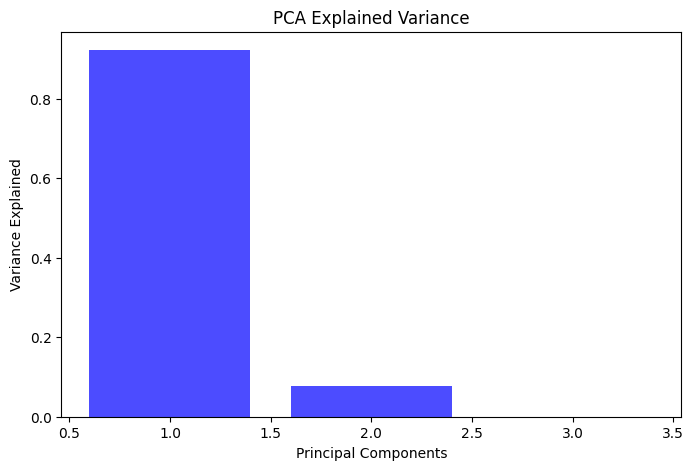

In [62]:
pca = PCA(n_components=3)  # Keeping top 3 principal components
principal_components = pca.fit_transform(df_standard)

# Create a DataFrame with principal components
df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(3)])

# Explained variance ratio (how much variance each PC explains)
print(f"Explained variance per PC: {pca.explained_variance_ratio_}")

# Visualize variance explained by each PC
plt.figure(figsize=(8, 5))
plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=0.7, color='b', label='Individual')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance')
plt.show()